In [293]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import xgboost as xgb
import math
import csv
import seaborn as sns
%matplotlib inline

In [268]:
location = 'A'
#location = 'B'
#location = 'C'  
observed = True

if observed: csv_filename = "/Users/simenstang/Documents/TDT4173/data/" + location + "/sorted_feature_correlations_" + location + "_observed.csv"
else: csv_filename = "/Users/simenstang/Documents/TDT4173/data/" + location + "/sorted_feature_correlations_" + location +  "_estimated.csv"

df = pd.read_csv(csv_filename)

In [269]:
avg_correlation = df.groupby('Feature')['Correlation'].mean().reset_index()
avg_correlation.sort_values(by='Correlation', key=abs, ascending=False).head(10)

,Feature,Correlation
12,direct_rad_1h:J,0.362685
11,direct_rad:W,0.358962
13,effective_cloud_cover:p,-0.325929
40,total_cloud_cover:p,-0.280998
41,visibility:m,0.258690
29,relative_humidity_1000hPa:p,-0.209124
38,super_cooled_liquid_water:kgm2,-0.195630
2,ceiling_height_agl:m,0.185124
37,sun_elevation:d,0.182524
5,cloud_base_agl:m,0.178856


In [270]:
location = 'B'
observed = True
if observed: csv_filename = "/Users/simenstang/Documents/TDT4173/data/" + location + "/sorted_feature_correlations_" + location + "_observed.csv"
else: csv_filename = "/Users/simenstang/Documents/TDT4173/data/" + location + "/sorted_feature_correlations_" + location +  "_estimated.csv"

df = pd.read_csv(csv_filename)

In [271]:
avg_correlation = df.groupby('Feature')['Correlation'].mean().reset_index()
avg_correlation.sort_values(by='Correlation', key=abs, ascending=False).head(10)

,Feature,Correlation
11,direct_rad:W,0.233218
12,direct_rad_1h:J,0.229888
37,sun_elevation:d,0.171454
13,effective_cloud_cover:p,-0.166713
3,clear_sky_energy_1h:J,0.153714
4,clear_sky_rad:W,0.150085
41,visibility:m,0.137576
29,relative_humidity_1000hPa:p,-0.133272
40,total_cloud_cover:p,-0.133161
5,cloud_base_agl:m,0.131772


In [272]:
location = 'C'  
observed = True

if observed: csv_filename = "/Users/simenstang/Documents/TDT4173/data/" + location + "/sorted_feature_correlations_" + location + "_observed.csv"
else: csv_filename = "/Users/simenstang/Documents/TDT4173/data/" + location + "/sorted_feature_correlations_" + location +  "_estimated.csv"

df = pd.read_csv(csv_filename)

In [273]:
avg_correlation = df.groupby('Feature')['Correlation'].mean().reset_index()
avg_correlation.sort_values(by='Correlation', key=abs, ascending=False).head(10)

,Feature,Correlation
12,direct_rad_1h:J,0.288841
11,direct_rad:W,0.285508
13,effective_cloud_cover:p,-0.233356
37,sun_elevation:d,0.215204
4,clear_sky_rad:W,0.210782
3,clear_sky_energy_1h:J,0.209693
41,visibility:m,0.203009
40,total_cloud_cover:p,-0.192287
29,relative_humidity_1000hPa:p,-0.170591
2,ceiling_height_agl:m,0.161959


In [274]:
train_a = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/A/train_targets.parquet')
train_b = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/B/train_targets.parquet')
train_c = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/C/train_targets.parquet')

X_train_estimated_a = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/A/X_test_estimated.parquet')
X_train_estimated_b = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/B/X_test_estimated.parquet')
X_train_estimated_c = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/C/X_test_estimated.parquet')

X_train_observed_a = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/C/X_train_observed.parquet')

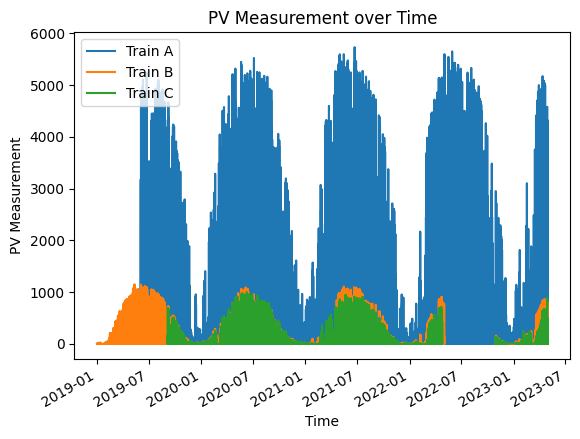

In [275]:
fig, ax = plt.subplots()

train_a.plot(x='time', y='pv_measurement', ax=ax, label='Train A')
train_b.plot(x='time', y='pv_measurement', ax=ax, label='Train B')
train_c.plot(x='time', y='pv_measurement', ax=ax, label='Train C')

ax.set_xlabel('Time')
ax.set_ylabel('PV Measurement')
ax.set_title('PV Measurement over Time')
ax.legend()

plt.show()

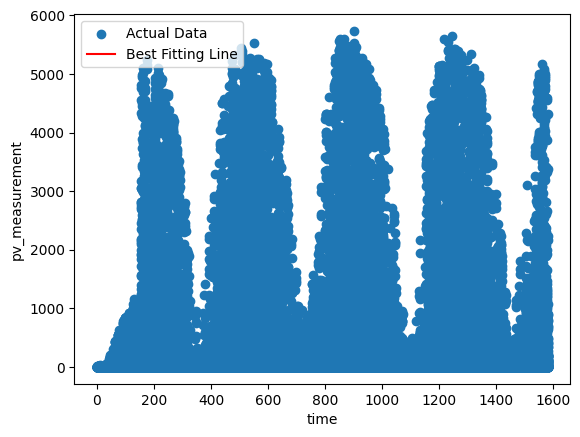

In [276]:
combined_data = pd.concat([train_a, train_b, train_c], ignore_index=True)

combined_data['time'] = pd.to_datetime(combined_data['time'])
start_date = combined_data['time'].min()
combined_data['days_since_start'] = (combined_data['time'] - start_date).dt.days

X = combined_data['days_since_start'].values
y = combined_data['pv_measurement'].values

# Using numpy's polyfit with a degree of 1 (linear regression)
slope, intercept = np.polyfit(X, y, 1)
y_pred = slope * X + intercept

# Plot the actual data and the best fitting line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Best Fitting Line')
plt.xlabel('time')
plt.ylabel('pv_measurement')
plt.legend()
plt.show()


In [277]:
train_a.columns

Index(['time', 'pv_measurement'], dtype='object')

In [278]:
X_train_observed_a.columns

Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms',

In [279]:
X_train_estimated_a.columns

Index(['date_calc', 'date_forecast', 'absolute_humidity_2m:gm3',
       'air_density_2m:kgm3', 'ceiling_height_agl:m', 'clear_sky_energy_1h:J',
       'clear_sky_rad:W', 'cloud_base_agl:m', 'dew_or_rime:idx',
       'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W',
       'direct_rad_1h:J', 'effective_cloud_cover:p', 'elevation:m',
       'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm',
       'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx',
       'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm',
       'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa',
       'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
       'sfc_pressure:hPa', 'snow_density:kgm3', 'snow_depth:cm',
       'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2',
       'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2',
       't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m',
       'wind_speed_10m:ms', 'wind_spe

In [280]:
df_corr = X_train_observed_a[X_train_observed_a.columns].dropna().corr()
df_corr

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
date_forecast,1.000000,-0.364513,0.090276,0.209084,-0.043496,-0.033926,0.083571,NaN,-0.261636,0.010228,...,-0.009138,-0.013354,-0.447940,-0.216089,-0.118499,0.172299,-0.294924,-0.225484,-0.055966,NaN
absolute_humidity_2m:gm3,-0.364513,1.000000,-0.857602,0.056992,-0.068479,-0.087647,0.045658,NaN,0.978959,-0.129859,...,0.110534,-0.008362,0.496380,0.927333,0.569043,-0.273296,0.593597,0.543985,0.083139,NaN
air_density_2m:kgm3,0.090276,-0.857602,1.000000,-0.295245,-0.001294,0.018155,-0.250209,NaN,-0.914147,0.034172,...,-0.144746,-0.074777,-0.320810,-0.922261,-0.661516,0.002749,-0.568964,-0.372714,-0.119160,NaN
ceiling_height_agl:m,0.209084,0.056992,-0.295245,1.000000,0.152044,0.162010,0.803713,NaN,0.143392,0.191918,...,0.027230,0.188215,-0.237284,0.284946,0.453997,0.571267,0.227954,-0.201776,0.139240,NaN
clear_sky_energy_1h:J,-0.043496,-0.068479,-0.001294,0.152044,1.000000,0.976943,0.178664,NaN,-0.054996,0.936038,...,0.049636,0.618790,0.010064,-0.066191,0.028155,0.348868,-0.017996,-0.077742,-0.041048,NaN
clear_sky_rad:W,-0.033926,-0.087647,0.018155,0.162010,0.976943,1.000000,0.183649,NaN,-0.076697,0.963081,...,0.018215,0.627164,-0.014068,-0.082229,0.014745,0.335884,-0.012425,-0.088657,-0.042667,NaN
cloud_base_agl:m,0.083571,0.045658,-0.250209,0.803713,0.178664,0.183649,1.000000,NaN,0.112581,0.227539,...,-0.021689,0.204942,-0.166413,0.242841,0.383005,0.542974,0.178168,-0.209517,0.041064,NaN
dew_or_rime:idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dew_point_2m:K,-0.261636,0.978959,-0.914147,0.143392,-0.054996,-0.076697,0.112581,NaN,1.000000,-0.111986,...,0.133352,-0.001497,0.443116,0.951811,0.616784,-0.172694,0.609054,0.516385,0.095252,NaN
diffuse_rad:W,0.010228,-0.129859,0.034172,0.191918,0.936038,0.963081,0.227539,NaN,-0.111986,1.000000,...,0.014266,0.637980,-0.103832,-0.111261,0.021965,0.380820,-0.036024,-0.096230,-0.026156,NaN


In [281]:
def plot_corr_heatmap(df):
    
    corr = df_corr

    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(15, 10))

    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)
    plt.title(f'Correlation Heatmap')
    plt.show()

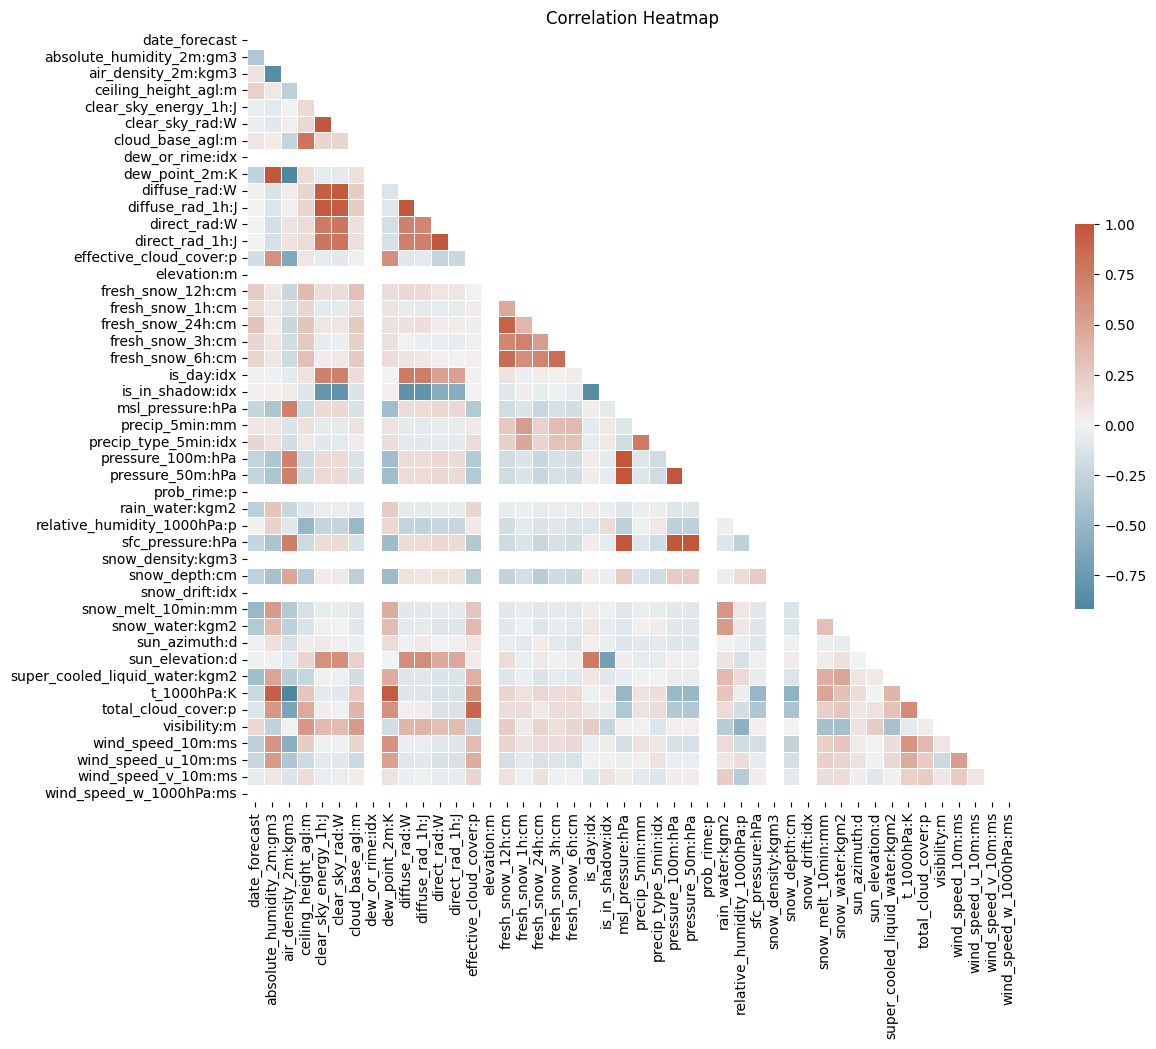

In [282]:
plot_corr_heatmap(X_train_observed_a.columns)

# DATASETS 

Try to make some easy datasets to test on that makes sense

# Y values

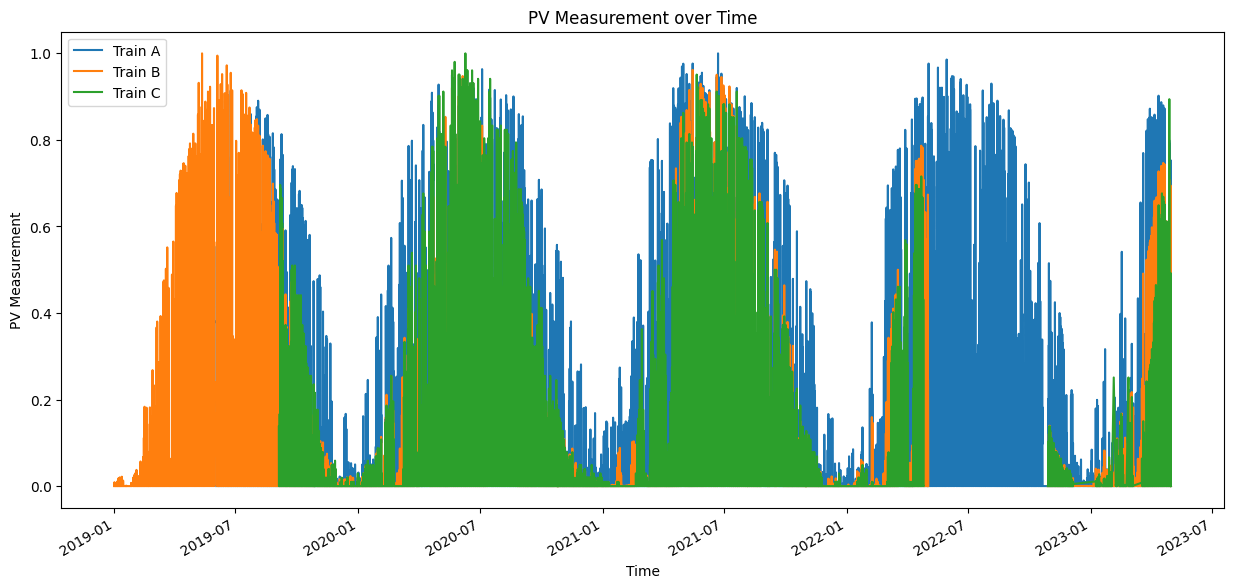

In [283]:
def min_max(data):
    data['pv_measurement'] = (data['pv_measurement'] - data['pv_measurement'].min()) / \
                            (data['pv_measurement'].max() - data['pv_measurement'].min())
    
min_max(train_a)
min_max(train_b)
min_max(train_c)

fig, ax = plt.subplots(figsize=(15,7))

train_a.plot(x='time', y='pv_measurement', ax=ax, label='Train A')
train_b.plot(x='time', y='pv_measurement', ax=ax, label='Train B')
train_c.plot(x='time', y='pv_measurement', ax=ax, label='Train C')

ax.set_xlabel('Time')
ax.set_ylabel('PV Measurement')
ax.set_title('PV Measurement over Time')
ax.legend()

plt.show()

In [284]:
train_a.columns

Index(['time', 'pv_measurement'], dtype='object')

In [344]:
train_a.set_index('time', inplace=True)
train_b.set_index('time', inplace=True)
train_c.set_index('time', inplace=True)

dfs = [train_a['pv_measurement'], train_b['pv_measurement'], train_c['pv_measurement']]
all_measurements = pd.concat(dfs, axis=1, join='outer')

all_measurements.dropna(how='all', inplace=True)

all_measurements['average_pv_measurement'] = all_measurements.mean(axis=1, skipna=True)

all_measurements['day_of_week'] = all_measurements.index.dayofweek  # Monday=0, Sunday=6
all_measurements['week_of_year'] = all_measurements.index.isocalendar().week
all_measurements['hour_of_day'] = all_measurements.index.hour
all_measurements['month'] = all_measurements.index.month

all_measurements.reset_index(drop=True, inplace=True)

average_dataset = all_measurements[['average_pv_measurement']].reset_index()


KeyError: "None of ['time'] are in the columns"

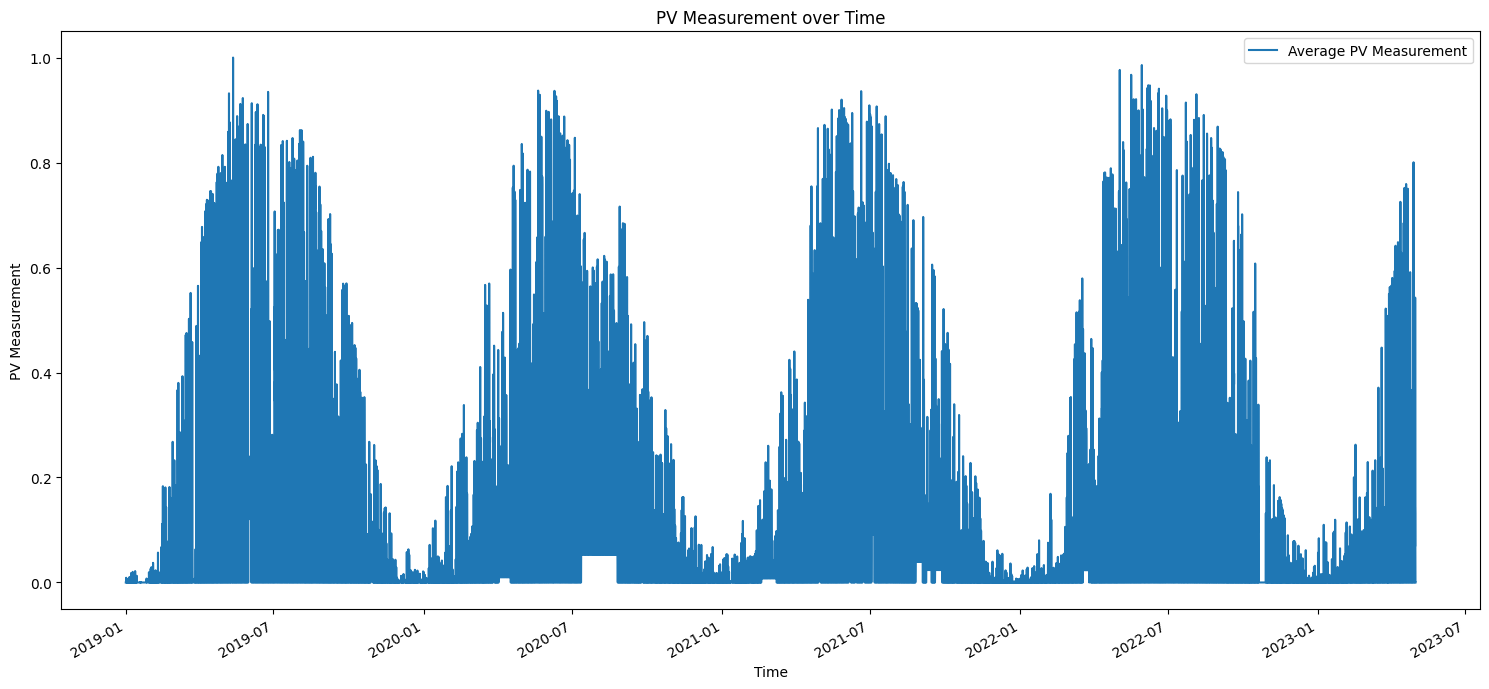

In [286]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15,7))

average_dataset.plot(x='time', y='average_pv_measurement', ax=ax, label='Average PV Measurement')

ax.set_xlabel('Time')
ax.set_ylabel('PV Measurement')
ax.set_title('PV Measurement over Time')
ax.legend()

plt.tight_layout()
plt.show()

So this works ish. Not perfect.  

In [287]:
from IPython.display import display, HTML

# Convert the DataFrames to HTML
df1 = average_dataset.head(5).to_html()
df2 = train_a.head(5).to_html()
df3 = train_b.head(5).to_html()
df4 = train_c.head(5).to_html()

# Combine them using HTML's table structure
display(HTML(
    '<table><tr><td>' + df1 + '</td><td>' + df2 + '</td><td>' + df3 + '</td></tr></table>' + df4 + '</td></tr></table>'
))

It can handle NaN. But we need a way to handle fucked up values somehow. 

Lets try some different methods

Rolling mean

In [288]:
# 1. Compute rolling mean and standard deviation
all_measurements['rolling_mean'] = all_measurements['average_pv_measurement'].rolling(window=4).mean()
all_measurements['rolling_std'] = all_measurements['average_pv_measurement'].rolling(window=4).std()

# 2. Create masks for outliers
mask_outliers = (all_measurements['average_pv_measurement'] > all_measurements['rolling_mean'] + 2*all_measurements['rolling_std']) | \
                (all_measurements['average_pv_measurement'] < all_measurements['rolling_mean'] - 2*all_measurements['rolling_std'])

# Option A: Replace outliers with NaN or some other value
#all_measurements.loc[mask_outliers, 'average_pv_measurement'] = np.nan

# Option B: Drop outliers
all_measurements = all_measurements.loc[~mask_outliers]

# Drop the additional columns (rolling_mean and rolling_std) we added
all_measurements.drop(['rolling_mean', 'rolling_std'], axis=1, inplace=True)


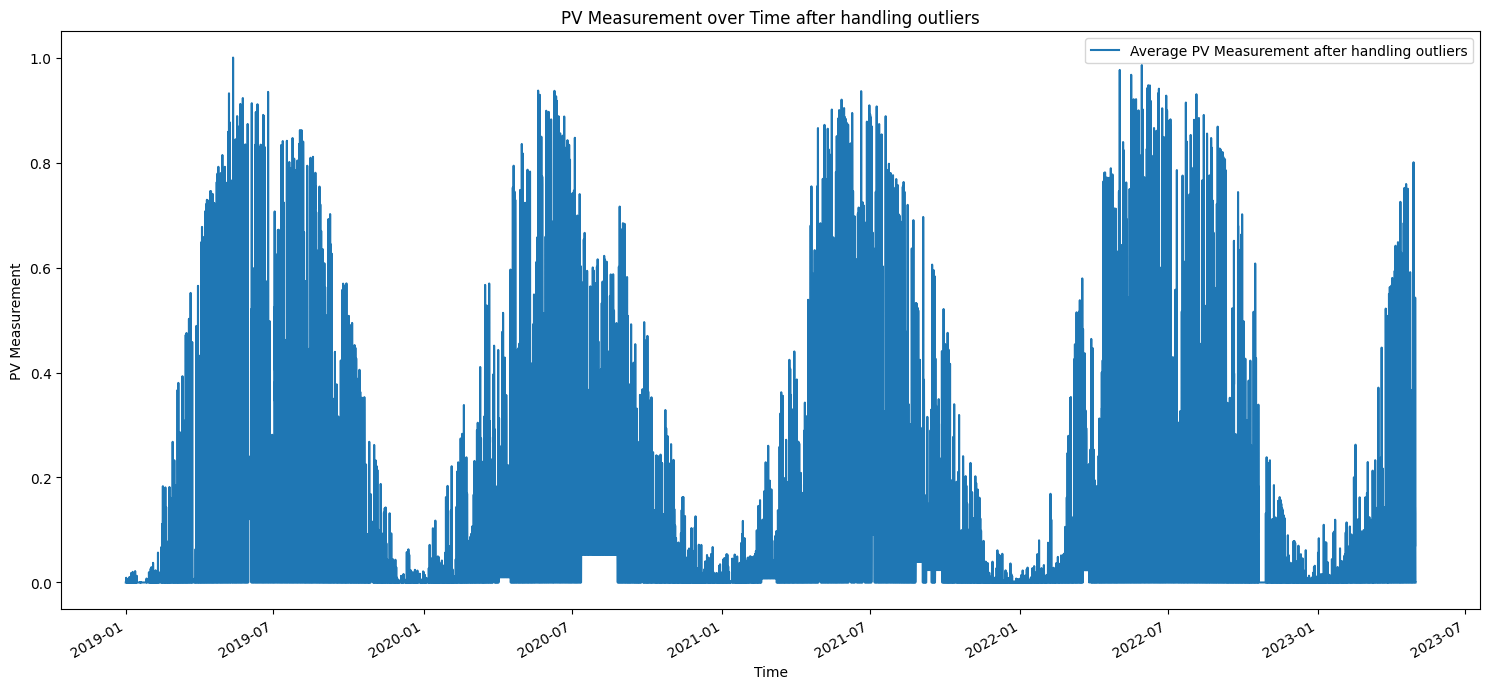

In [289]:
fig, ax = plt.subplots(figsize=(15,7))

# Plot the average PV measurement values
all_measurements['average_pv_measurement'].plot(ax=ax, label='Average PV Measurement after handling outliers')

# Highlight outliers if they are replaced by NaN (Optional, remove if not needed)
if all_measurements['average_pv_measurement'].isna().any():
    all_measurements['average_pv_measurement'].plot(marker='o', linestyle='', color='red', ax=ax)

ax.set_xlabel('Time')
ax.set_ylabel('PV Measurement')
ax.set_title('PV Measurement over Time after handling outliers')
ax.legend()

plt.tight_layout()
plt.show()


Z-scores

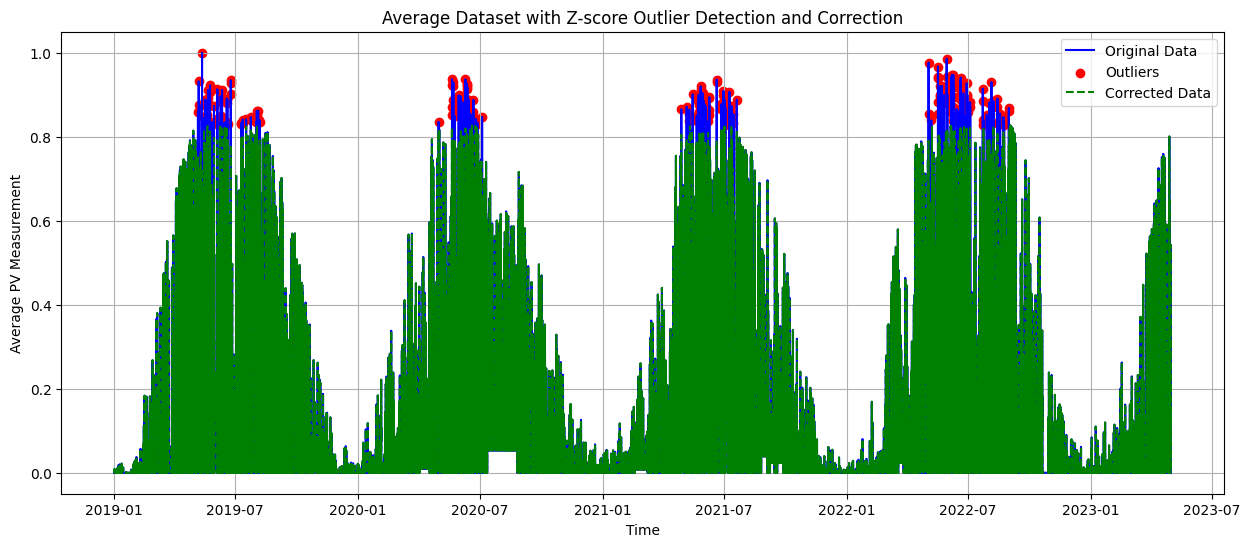

In [290]:
# Using the previously computed average_dataset
from scipy.stats import zscore

# 1. Calculate Z-scores
average_dataset['z_scores'] = zscore(average_dataset['average_pv_measurement'])

# 2. Identify outliers
threshold = 4
outliers = (average_dataset['z_scores'] > threshold) | (average_dataset['z_scores'] < -threshold)

# Plot original data
plt.figure(figsize=(15,6))
plt.plot(average_dataset['time'], average_dataset['average_pv_measurement'], label='Original Data', color='blue')

# Highlight outliers
plt.scatter(average_dataset['time'][outliers], average_dataset['average_pv_measurement'][outliers], color='red', label='Outliers')

# 3. Substitute outliers with approximations
median_value = average_dataset.loc[~outliers, 'average_pv_measurement'].median()
average_dataset.loc[outliers, 'average_pv_measurement'] = median_value

# Plot corrected data
plt.plot(average_dataset['time'], average_dataset['average_pv_measurement'], label='Corrected Data', color='green', linestyle='--')

plt.legend()
plt.title("Average Dataset with Z-score Outlier Detection and Correction")
plt.xlabel("Time")
plt.ylabel("Average PV Measurement")
plt.grid(True)
plt.show()


Isolation Forest

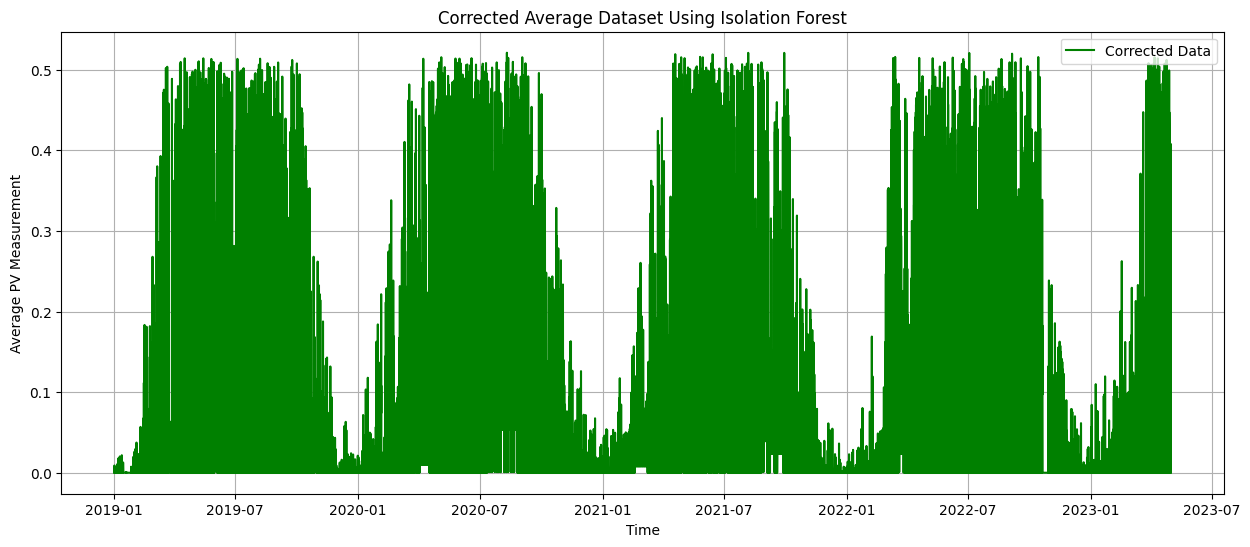

In [291]:
from sklearn.ensemble import IsolationForest

# Using the IsolationForest to identify outliers
clf = IsolationForest(contamination=0.05)
outliers = clf.fit_predict(average_dataset[['average_pv_measurement']]) == -1

# Substitute outliers with approximations
median_value = average_dataset.loc[~outliers, 'average_pv_measurement'].median()
average_dataset.loc[outliers, 'average_pv_measurement'] = median_value

# Plot corrected data
plt.figure(figsize=(15,6))
plt.plot(average_dataset['time'], average_dataset['average_pv_measurement'], label='Corrected Data', color='green')

plt.legend()
plt.title("Corrected Average Dataset Using Isolation Forest")
plt.xlabel("Time")
plt.ylabel("Average PV Measurement")
plt.grid(True)
plt.show()


Maybe just the average after alle, but probably better if we tweek it a little bit

# X values 

Lets do some shit with the X-values, and make a dataset we can train on

Split date format to seperat columns; date, month, time, year. Then the modell will itself figure out patterns in hours and months (day vs night, summer vs winter etc)

Hard to see patterns in strings. 

Normalization: All data should be in the same scale. Use MinMax scaling or zScore. 

Kategoriske variabler: One hot encoding - en feature for hver måned, år, dag, time. 

Singular value decomposition - demonsionality reduction. 

In [336]:
df_a = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/A/X_train_observed.parquet')
df_b = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/B/X_train_observed.parquet')
df_c = pd.read_parquet('/Users/simenstang/Documents/TDT4173/data/C/X_train_observed.parquet')

# Ensure date_forecast is set as the index for all datasets
df_a.set_index('date_forecast', inplace=True)
df_b.set_index('date_forecast', inplace=True)
df_c.set_index('date_forecast', inplace=True)

# Sum datasets together
sum_df = df_a.add(df_b, fill_value=0).add(df_c, fill_value=0)

# Create a mask for non-NaN values for each dataset
mask_a = df_a.notna().astype(int)
mask_b = df_b.notna().astype(int)
mask_c = df_c.notna().astype(int)

# Calculate the number of non-NaN values for each cell
count_non_nan = mask_a.add(mask_b, fill_value=0).add(mask_c, fill_value=0)

# Avoid division by zero and compute the average
average_df = sum_df.divide(count_non_nan, fill_value=0)

# Filter out rows that aren't on full hours
average_df = average_df[average_df.index.minute == 0]

# If you want only those hours that are :00:00
average_df = average_df[average_df.index.second == 0]

# Extract features from the date_forecast index
average_df['day_of_week'] = average_df.index.dayofweek  # Monday=0, Sunday=6
average_df['week_of_year'] = average_df.index.isocalendar().week
average_df['hour_of_day'] = average_df.index.hour
average_df['month'] = average_df.index.month

average_df.reset_index(drop=True, inplace=True)

average_df.head(5)   

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,day_of_week,week_of_year,hour_of_day,month
0,5.60,1.2395,1190.000000,0.0,0.0,1190.000000,0.5,275.299988,0.0,0.0,...,71.199997,18748.150391,2.50,1.10,2.20,0.0,1,1,0,1
1,5.35,1.2410,1124.099976,0.0,0.0,1124.099976,0.5,274.600006,0.0,0.0,...,99.400002,13207.299805,3.45,1.25,3.20,0.0,1,1,1,1
2,5.45,1.2380,1057.099976,0.0,0.0,1057.099976,0.0,274.950012,0.0,0.0,...,98.400002,12727.750000,3.85,1.90,3.35,0.0,1,1,2,1
3,5.25,1.2400,989.050049,0.0,0.0,989.050049,0.0,274.350006,0.0,0.0,...,97.500000,8575.750000,4.20,2.20,3.55,0.0,1,1,3,1
4,5.45,1.2390,991.950012,0.0,0.0,991.950012,0.0,274.950012,0.0,0.0,...,97.250000,4185.299805,5.70,4.75,3.10,0.0,1,1,4,1


# With this, try some predictions

In [337]:
x_train = average_df
y_train = average_dataset

In [338]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [340]:

dtrain = xgb.DMatrix(x_train, label=y_train)

/Users/simenstang/Documents/TDT4173/data/sigmoidwarriors/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/simenstang/Documents/TDT4173/data/sigmoidwarriors/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/simenstang/Documents/TDT4173/data/sigmoidwarriors/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/simenstang/Documents/TDT4173/data/sigmoidwarriors/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:time: datetime64[us]